___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.Exited.value_counts()

In [8]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [13]:
df = pd.get_dummies(df,drop_first=True)

In [14]:
df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,2,15647311,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,3,15619304,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,4,15701354,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,5,15737888,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,9997,15569892,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,9998,15584532,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,9999,15682355,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


In [16]:
df.shape

(10000, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(9), uint8(3)
memory usage: 888.8 KB


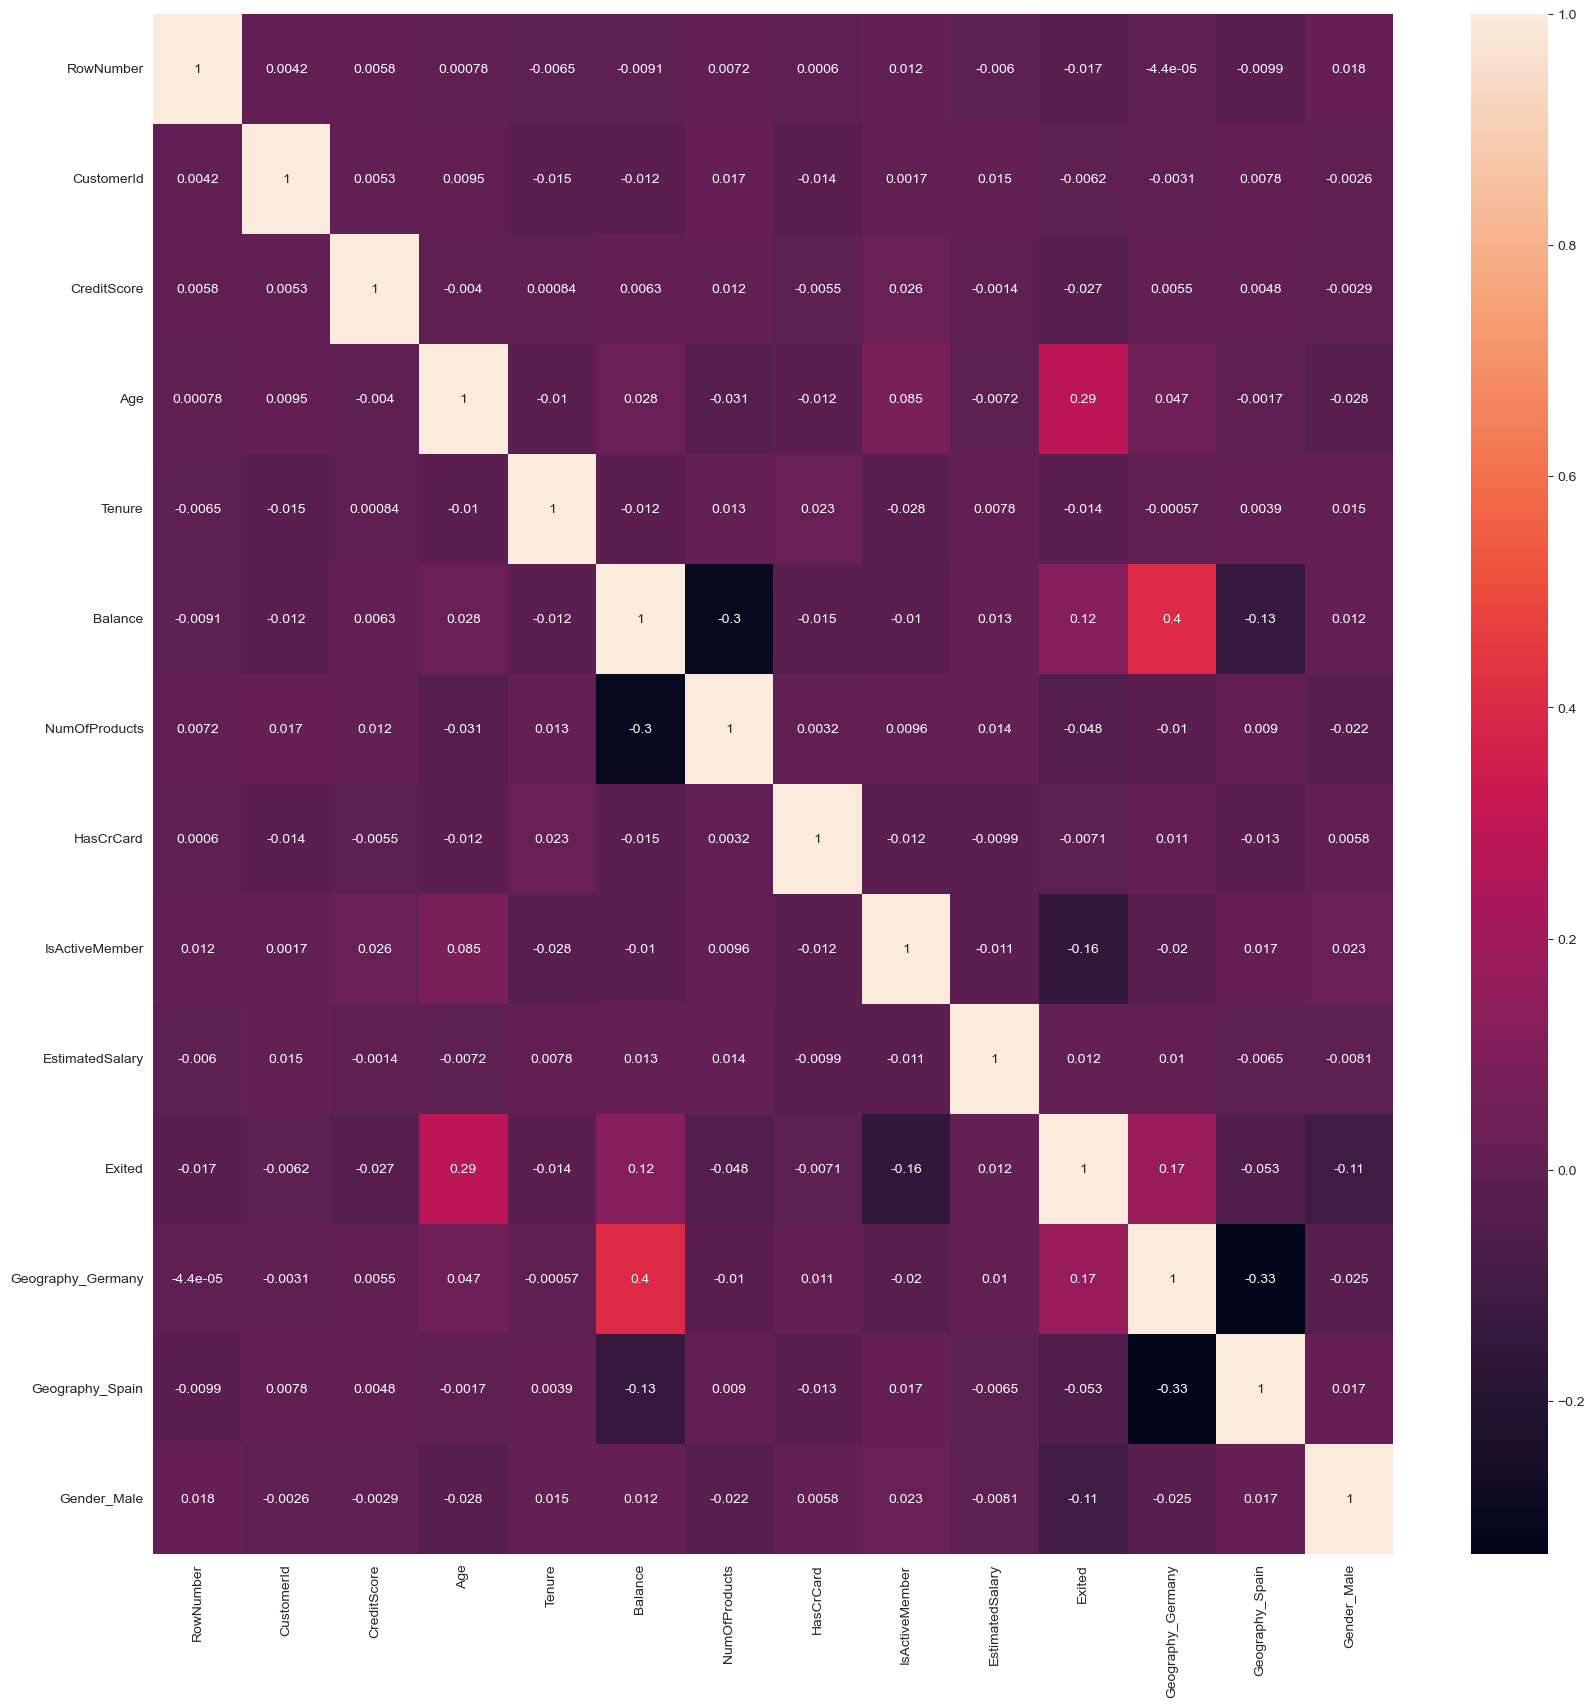

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

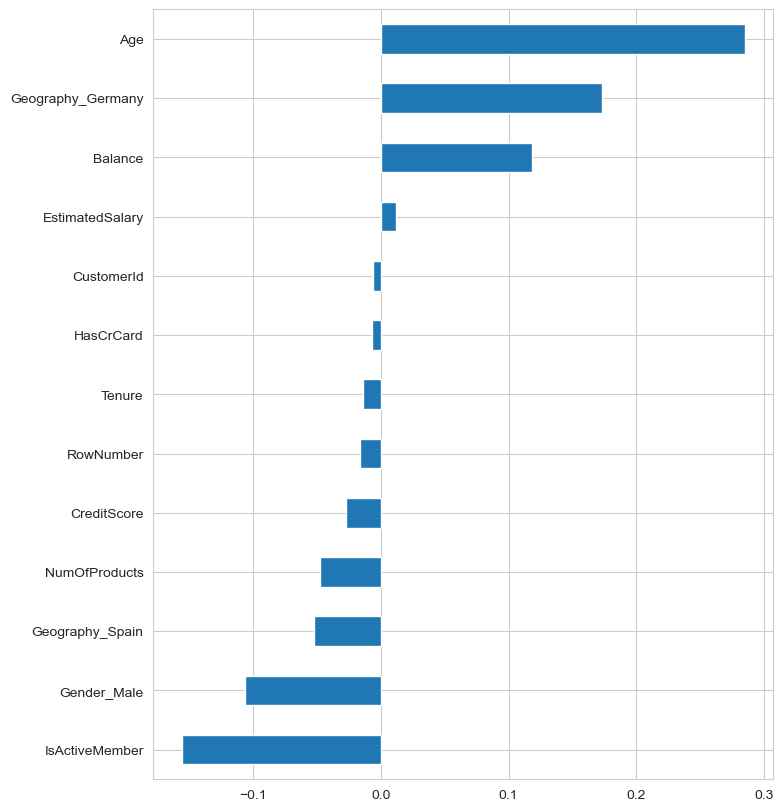

In [20]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

# Preprocessing of Data
- Train | Test Split, Scalling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [23]:
seed = 42

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [28]:
X_train.shape

(9000, 13)

In [29]:
X_test.shape

(1000, 13)

In [30]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [31]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1)

Epoch 1/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5137 - accuracy: 0.7960 - val_loss: 0.4648 - val_accuracy: 0.7989
Epoch 2/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7960 - val_loss: 0.4505 - val_accuracy: 0.7989
Epoch 3/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7960 - val_loss: 0.4361 - val_accuracy: 0.7989
Epoch 4/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7960 - val_loss: 0.4204 - val_accuracy: 0.7989
Epoch 5/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.7960 - val_loss: 0.4072 - val_accuracy: 0.7989
Epoch 6/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7960 - val_loss: 0.3945 - val_accuracy: 0.7989
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4114 - accuracy: 0.7960 - val_loss: 0.3823 - val_accuracy: 0.7989

Epoch 58/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8617 - val_loss: 0.3041 - val_accuracy: 0.8833
Epoch 59/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8642 - val_loss: 0.3038 - val_accuracy: 0.8822
Epoch 60/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3342 - accuracy: 0.8605 - val_loss: 0.3034 - val_accuracy: 0.8833
Epoch 61/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8651 - val_loss: 0.3029 - val_accuracy: 0.8822
Epoch 62/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8630 - val_loss: 0.3063 - val_accuracy: 0.8844
Epoch 63/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8631 - val_loss: 0.3095 - val_accuracy: 0.8833
Epoch 64/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8610 - val_loss: 0.3032 - val_accuracy:

Epoch 115/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8640 - val_loss: 0.2939 - val_accuracy: 0.8822
Epoch 116/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8640 - val_loss: 0.3008 - val_accuracy: 0.8833
Epoch 117/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8642 - val_loss: 0.3008 - val_accuracy: 0.8856
Epoch 118/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8677 - val_loss: 0.3017 - val_accuracy: 0.8867
Epoch 119/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8665 - val_loss: 0.2987 - val_accuracy: 0.8878
Epoch 120/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8667 - val_loss: 0.2968 - val_accuracy: 0.8856
Epoch 121/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8636 - val_loss: 0.3082 - val_ac

254/254 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8677 - val_loss: 0.2993 - val_accuracy: 0.8844
Epoch 172/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8670 - val_loss: 0.2974 - val_accuracy: 0.8878
Epoch 173/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8658 - val_loss: 0.2994 - val_accuracy: 0.8822
Epoch 174/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8673 - val_loss: 0.2968 - val_accuracy: 0.8822
Epoch 175/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8683 - val_loss: 0.2999 - val_accuracy: 0.8833
Epoch 176/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8668 - val_loss: 0.2961 - val_accuracy: 0.8811
Epoch 177/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8667 - val_loss: 0.2995 - val_accuracy: 0.8856

254/254 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8736 - val_loss: 0.3029 - val_accuracy: 0.8867
Epoch 228/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8681 - val_loss: 0.3048 - val_accuracy: 0.8867
Epoch 229/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8699 - val_loss: 0.3075 - val_accuracy: 0.8833
Epoch 230/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3086 - accuracy: 0.8719 - val_loss: 0.3019 - val_accuracy: 0.8833
Epoch 231/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8719 - val_loss: 0.3048 - val_accuracy: 0.8867
Epoch 232/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8701 - val_loss: 0.2993 - val_accuracy: 0.8822
Epoch 233/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8709 - val_loss: 0.3095 - val_accuracy: 0.8822

254/254 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8695 - val_loss: 0.3082 - val_accuracy: 0.8800
Epoch 284/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8744 - val_loss: 0.3103 - val_accuracy: 0.8867
Epoch 285/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8712 - val_loss: 0.3083 - val_accuracy: 0.8844
Epoch 286/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3051 - accuracy: 0.8733 - val_loss: 0.3072 - val_accuracy: 0.8844
Epoch 287/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8719 - val_loss: 0.3134 - val_accuracy: 0.8778
Epoch 288/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8728 - val_loss: 0.3063 - val_accuracy: 0.8833
Epoch 289/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8728 - val_loss: 0.3115 - val_accuracy: 0.8900

254/254 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8728 - val_loss: 0.3055 - val_accuracy: 0.8933
Epoch 340/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8740 - val_loss: 0.3119 - val_accuracy: 0.8811
Epoch 341/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8744 - val_loss: 0.3117 - val_accuracy: 0.8878
Epoch 342/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8732 - val_loss: 0.3133 - val_accuracy: 0.8856
Epoch 343/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8721 - val_loss: 0.3177 - val_accuracy: 0.8856
Epoch 344/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3008 - accuracy: 0.8731 - val_loss: 0.3130 - val_accuracy: 0.8833
Epoch 345/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3009 - accuracy: 0.8754 - val_loss: 0.3153 - val_accuracy: 0.8856

254/254 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8721 - val_loss: 0.3153 - val_accuracy: 0.8844
Epoch 396/500
254/254 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.8744 - val_loss: 0.3135 - val_accuracy: 0.8867
Epoch 397/500
254/254 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.8735 - val_loss: 0.3135 - val_accuracy: 0.8867
Epoch 398/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8751 - val_loss: 0.3096 - val_accuracy: 0.8856
Epoch 399/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8751 - val_loss: 0.3139 - val_accuracy: 0.8856
Epoch 400/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8741 - val_loss: 0.3078 - val_accuracy: 0.8844
Epoch 401/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8732 - val_loss: 0.3107 - val_accuracy: 0.8878

254/254 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8765 - val_loss: 0.3209 - val_accuracy: 0.8822
Epoch 452/500
254/254 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8730 - val_loss: 0.3157 - val_accuracy: 0.8833
Epoch 453/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.8764 - val_loss: 0.3223 - val_accuracy: 0.8844
Epoch 454/500
254/254 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.8735 - val_loss: 0.3239 - val_accuracy: 0.8767
Epoch 455/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8764 - val_loss: 0.3178 - val_accuracy: 0.8867
Epoch 456/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8774 - val_loss: 0.3209 - val_accuracy: 0.8822
Epoch 457/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8765 - val_loss: 0.3198 - val_accuracy: 0.8800

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.514,0.796,0.465,0.799
1,0.470,0.796,0.450,0.799
2,0.460,0.796,0.436,0.799
3,0.448,0.796,0.420,0.799
4,0.436,0.796,0.407,0.799


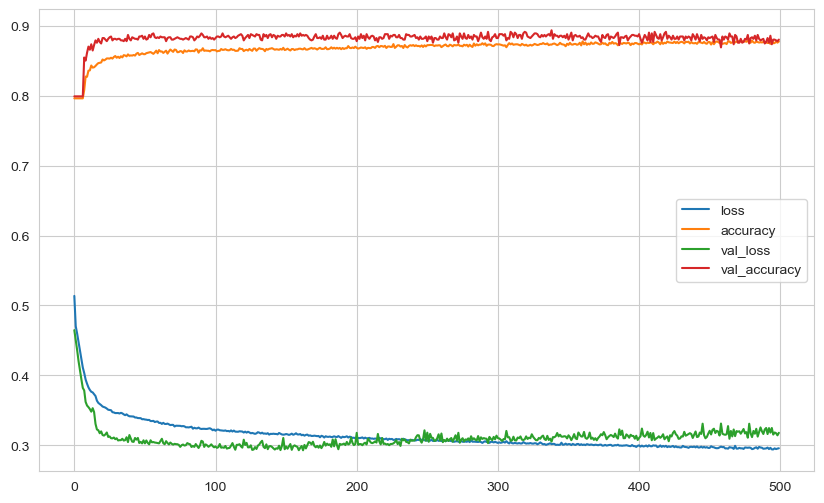

In [34]:
loss_df.plot();

In [35]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.38913342356681824
accuracy :  0.8450000286102295


In [36]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[759  37]
 [118  86]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.42      0.53       204

    accuracy                           0.84      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.83      0.84      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [37]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [45]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [46]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.6739 - accuracy: 0.5410 - val_loss: 0.6509 - val_accuracy: 0.6556
Epoch 2/500
254/254 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6633 - val_loss: 0.6075 - val_accuracy: 0.6967
Epoch 3/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.6900 - val_loss: 0.5704 - val_accuracy: 0.7256
Epoch 4/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7005 - val_loss: 0.5590 - val_accuracy: 0.7100
Epoch 5/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7195 - val_loss: 0.5118 - val_accuracy: 0.7578
Epoch 6/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7346 - val_loss: 0.5342 - val_accuracy: 0.7311
Epoch 7/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7433 - val_loss: 0.4663 - val_accuracy: 0.8000

254/254 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.7781 - val_loss: 0.4745 - val_accuracy: 0.7756
Epoch 23/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4837 - accuracy: 0.7752 - val_loss: 0.3872 - val_accuracy: 0.8467
Epoch 24/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7796 - val_loss: 0.5088 - val_accuracy: 0.7489
Epoch 25/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4797 - accuracy: 0.7844 - val_loss: 0.4195 - val_accuracy: 0.8167
Epoch 26/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7779 - val_loss: 0.4881 - val_accuracy: 0.7600
Epoch 27/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7802 - val_loss: 0.4811 - val_accuracy: 0.7622
Epoch 28/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4777 - accuracy: 0.7828 - val_loss: 0.4270 - val_accuracy: 0.8200
Epoch

254/254 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7905 - val_loss: 0.4592 - val_accuracy: 0.7944
Epoch 45/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7886 - val_loss: 0.4145 - val_accuracy: 0.8278
Epoch 46/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7901 - val_loss: 0.4629 - val_accuracy: 0.7911
Epoch 47/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7865 - val_loss: 0.4328 - val_accuracy: 0.8100
Epoch 48/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7889 - val_loss: 0.4284 - val_accuracy: 0.8244
Epoch 49/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7901 - val_loss: 0.4009 - val_accuracy: 0.8411
Epoch 50/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7915 - val_loss: 0.4298 - val_accuracy: 0.8267
Epoch

254/254 [==============================] - 1s 2ms/step - loss: 0.4635 - accuracy: 0.7958 - val_loss: 0.4453 - val_accuracy: 0.8078
Epoch 66/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7919 - val_loss: 0.5013 - val_accuracy: 0.7600
Epoch 67/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7898 - val_loss: 0.3828 - val_accuracy: 0.8444
Epoch 68/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.7925 - val_loss: 0.4276 - val_accuracy: 0.8244
Epoch 69/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4642 - accuracy: 0.7928 - val_loss: 0.4450 - val_accuracy: 0.8100
Epoch 70/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4653 - accuracy: 0.7915 - val_loss: 0.4370 - val_accuracy: 0.8089
Epoch 71/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4654 - accuracy: 0.7875 - val_loss: 0.4367 - val_accuracy: 0.8122
Epoch

254/254 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7932 - val_loss: 0.4611 - val_accuracy: 0.7911
Epoch 88/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7873 - val_loss: 0.4545 - val_accuracy: 0.7967
Epoch 89/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.7988 - val_loss: 0.4594 - val_accuracy: 0.7833
Epoch 90/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4609 - accuracy: 0.7874 - val_loss: 0.4281 - val_accuracy: 0.8156
Epoch 91/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.7916 - val_loss: 0.4643 - val_accuracy: 0.7900
Epoch 92/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7958 - val_loss: 0.4730 - val_accuracy: 0.7778
Epoch 93/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7948 - val_loss: 0.4273 - val_accuracy: 0.8122
Epoch

254/254 [==============================] - 1s 2ms/step - loss: 0.4565 - accuracy: 0.7948 - val_loss: 0.4819 - val_accuracy: 0.7644
Epoch 109/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7912 - val_loss: 0.4249 - val_accuracy: 0.8078
Epoch 110/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7942 - val_loss: 0.4512 - val_accuracy: 0.7900
Epoch 111/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7906 - val_loss: 0.3772 - val_accuracy: 0.8444
Epoch 112/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4560 - accuracy: 0.7948 - val_loss: 0.4570 - val_accuracy: 0.7867
Epoch 113/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7936 - val_loss: 0.5111 - val_accuracy: 0.7444
Epoch 114/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.7925 - val_loss: 0.4452 - val_accuracy: 0.7922

254/254 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7946 - val_loss: 0.4214 - val_accuracy: 0.8111
Epoch 131/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7938 - val_loss: 0.4521 - val_accuracy: 0.7911
Epoch 132/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7968 - val_loss: 0.5150 - val_accuracy: 0.7400
Epoch 133/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.7959 - val_loss: 0.3869 - val_accuracy: 0.8322
Epoch 134/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7990 - val_loss: 0.4495 - val_accuracy: 0.7878
Epoch 135/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7964 - val_loss: 0.4357 - val_accuracy: 0.8000
Epoch 136/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.7959 - val_loss: 0.4357 - val_accuracy: 0.8033

254/254 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.8004 - val_loss: 0.4648 - val_accuracy: 0.7722
Epoch 152/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.7968 - val_loss: 0.4084 - val_accuracy: 0.8178
Epoch 153/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7985 - val_loss: 0.3885 - val_accuracy: 0.8256
Epoch 154/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7979 - val_loss: 0.4918 - val_accuracy: 0.7533
Epoch 155/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.7931 - val_loss: 0.4123 - val_accuracy: 0.8100
Epoch 156/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4444 - accuracy: 0.7993 - val_loss: 0.4879 - val_accuracy: 0.7622
Epoch 157/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.7998 - val_loss: 0.4429 - val_accuracy: 0.7878

254/254 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7949 - val_loss: 0.4432 - val_accuracy: 0.7900
Epoch 174/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.7974 - val_loss: 0.4309 - val_accuracy: 0.7844
Epoch 175/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.7978 - val_loss: 0.3890 - val_accuracy: 0.8233
Epoch 176/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8015 - val_loss: 0.4166 - val_accuracy: 0.7911
Epoch 177/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7948 - val_loss: 0.3995 - val_accuracy: 0.8200
Epoch 178/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8028 - val_loss: 0.4810 - val_accuracy: 0.7567
Epoch 179/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7978 - val_loss: 0.4153 - val_accuracy: 0.8011

254/254 [==============================] - 1s 2ms/step - loss: 0.4351 - accuracy: 0.8027 - val_loss: 0.4391 - val_accuracy: 0.7822
Epoch 195/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.8026 - val_loss: 0.4897 - val_accuracy: 0.7533
Epoch 196/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7964 - val_loss: 0.4222 - val_accuracy: 0.7978
Epoch 197/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4361 - accuracy: 0.8025 - val_loss: 0.5553 - val_accuracy: 0.7144
Epoch 198/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.7963 - val_loss: 0.4709 - val_accuracy: 0.7667
Epoch 199/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7967 - val_loss: 0.4017 - val_accuracy: 0.8133
Epoch 200/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.7988 - val_loss: 0.4089 - val_accuracy: 0.8122

254/254 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8032 - val_loss: 0.4821 - val_accuracy: 0.7644
Epoch 217/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7993 - val_loss: 0.4575 - val_accuracy: 0.7733
Epoch 218/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.7977 - val_loss: 0.4562 - val_accuracy: 0.7756
Epoch 219/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4318 - accuracy: 0.8049 - val_loss: 0.4609 - val_accuracy: 0.7656
Epoch 220/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.7956 - val_loss: 0.3749 - val_accuracy: 0.8378
Epoch 221/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.7999 - val_loss: 0.4193 - val_accuracy: 0.7944
Epoch 222/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4314 - accuracy: 0.7981 - val_loss: 0.4531 - val_accuracy: 0.7789

254/254 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8035 - val_loss: 0.4016 - val_accuracy: 0.8133
Epoch 238/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8031 - val_loss: 0.4320 - val_accuracy: 0.7900
Epoch 239/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8002 - val_loss: 0.4230 - val_accuracy: 0.7911
Epoch 240/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8031 - val_loss: 0.3739 - val_accuracy: 0.8400
Epoch 241/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8033 - val_loss: 0.4300 - val_accuracy: 0.7900
Epoch 242/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.7994 - val_loss: 0.4330 - val_accuracy: 0.7922
Epoch 243/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4274 - accuracy: 0.7973 - val_loss: 0.4717 - val_accuracy: 0.7589

254/254 [==============================] - 1s 2ms/step - loss: 0.4247 - accuracy: 0.8060 - val_loss: 0.4659 - val_accuracy: 0.7667
Epoch 260/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.7999 - val_loss: 0.4139 - val_accuracy: 0.7989
Epoch 261/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.7996 - val_loss: 0.3575 - val_accuracy: 0.8433
Epoch 262/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8023 - val_loss: 0.4040 - val_accuracy: 0.8111
Epoch 263/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4271 - accuracy: 0.7990 - val_loss: 0.4348 - val_accuracy: 0.7889
Epoch 264/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8033 - val_loss: 0.4448 - val_accuracy: 0.7778
Epoch 265/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8028 - val_loss: 0.4231 - val_accuracy: 0.7922

254/254 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8040 - val_loss: 0.3780 - val_accuracy: 0.8278
Epoch 281/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8054 - val_loss: 0.4700 - val_accuracy: 0.7667
Epoch 282/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8033 - val_loss: 0.3509 - val_accuracy: 0.8567
Epoch 283/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8058 - val_loss: 0.4447 - val_accuracy: 0.7756
Epoch 284/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8023 - val_loss: 0.4623 - val_accuracy: 0.7733
Epoch 285/500
254/254 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.8027 - val_loss: 0.4175 - val_accuracy: 0.7978
Epoch 286/500
254/254 [==============================] - 1s 3ms/step - loss: 0.4236 - accuracy: 0.8048 - val_loss: 0.4584 - val_accuracy: 0.7656

254/254 [==============================] - 1s 2ms/step - loss: 0.4217 - accuracy: 0.8058 - val_loss: 0.4122 - val_accuracy: 0.7989
Epoch 303/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4233 - accuracy: 0.8032 - val_loss: 0.4063 - val_accuracy: 0.8089
Epoch 304/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8077 - val_loss: 0.4328 - val_accuracy: 0.7911
Epoch 305/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.8036 - val_loss: 0.4333 - val_accuracy: 0.7867
Epoch 306/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8059 - val_loss: 0.4729 - val_accuracy: 0.7633
Epoch 307/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8026 - val_loss: 0.5072 - val_accuracy: 0.7422
Epoch 308/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8046 - val_loss: 0.3647 - val_accuracy: 0.8367

254/254 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8074 - val_loss: 0.4388 - val_accuracy: 0.7833
Epoch 324/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8051 - val_loss: 0.4972 - val_accuracy: 0.7478
Epoch 325/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8051 - val_loss: 0.4996 - val_accuracy: 0.7467
Epoch 326/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8038 - val_loss: 0.4488 - val_accuracy: 0.7856
Epoch 327/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8079 - val_loss: 0.4247 - val_accuracy: 0.7944
Epoch 328/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8052 - val_loss: 0.4101 - val_accuracy: 0.8133
Epoch 329/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8090 - val_loss: 0.4571 - val_accuracy: 0.7744

254/254 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8051 - val_loss: 0.3706 - val_accuracy: 0.8433
Epoch 346/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8072 - val_loss: 0.4574 - val_accuracy: 0.7756
Epoch 347/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8060 - val_loss: 0.4584 - val_accuracy: 0.7700
Epoch 348/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8089 - val_loss: 0.4650 - val_accuracy: 0.7756
Epoch 349/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4232 - accuracy: 0.8006 - val_loss: 0.4112 - val_accuracy: 0.8078
Epoch 350/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8077 - val_loss: 0.4339 - val_accuracy: 0.7911
Epoch 351/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8059 - val_loss: 0.4402 - val_accuracy: 0.7867

254/254 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8043 - val_loss: 0.4047 - val_accuracy: 0.8056
Epoch 367/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8080 - val_loss: 0.4190 - val_accuracy: 0.7967
Epoch 368/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8060 - val_loss: 0.4874 - val_accuracy: 0.7533
Epoch 369/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4195 - accuracy: 0.8053 - val_loss: 0.4355 - val_accuracy: 0.7867
Epoch 370/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8068 - val_loss: 0.4133 - val_accuracy: 0.8033
Epoch 371/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8077 - val_loss: 0.4028 - val_accuracy: 0.8044
Epoch 372/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8086 - val_loss: 0.4062 - val_accuracy: 0.8044

254/254 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8052 - val_loss: 0.5162 - val_accuracy: 0.7389
Epoch 389/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8037 - val_loss: 0.4337 - val_accuracy: 0.7922
Epoch 390/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8107 - val_loss: 0.4361 - val_accuracy: 0.7878
Epoch 391/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4156 - accuracy: 0.8084 - val_loss: 0.4229 - val_accuracy: 0.7967
Epoch 392/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4180 - accuracy: 0.8035 - val_loss: 0.3908 - val_accuracy: 0.8233
Epoch 393/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8085 - val_loss: 0.4383 - val_accuracy: 0.7856
Epoch 394/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8106 - val_loss: 0.4410 - val_accuracy: 0.7811

254/254 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8094 - val_loss: 0.4228 - val_accuracy: 0.7967
Epoch 410/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8110 - val_loss: 0.4957 - val_accuracy: 0.7500
Epoch 411/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8093 - val_loss: 0.4702 - val_accuracy: 0.7633
Epoch 412/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8098 - val_loss: 0.3956 - val_accuracy: 0.8200
Epoch 413/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8063 - val_loss: 0.4317 - val_accuracy: 0.7989
Epoch 414/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8086 - val_loss: 0.4342 - val_accuracy: 0.7800
Epoch 415/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8137 - val_loss: 0.4678 - val_accuracy: 0.7556

254/254 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8069 - val_loss: 0.4457 - val_accuracy: 0.7867
Epoch 432/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8096 - val_loss: 0.4550 - val_accuracy: 0.7778
Epoch 433/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4165 - accuracy: 0.8094 - val_loss: 0.4688 - val_accuracy: 0.7678
Epoch 434/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8065 - val_loss: 0.4348 - val_accuracy: 0.7933
Epoch 435/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8091 - val_loss: 0.4227 - val_accuracy: 0.7956
Epoch 436/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8063 - val_loss: 0.4059 - val_accuracy: 0.8100
Epoch 437/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4149 - accuracy: 0.8080 - val_loss: 0.4497 - val_accuracy: 0.7756

254/254 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8035 - val_loss: 0.3835 - val_accuracy: 0.8278
Epoch 453/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8086 - val_loss: 0.4055 - val_accuracy: 0.8156
Epoch 454/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4156 - accuracy: 0.8107 - val_loss: 0.4565 - val_accuracy: 0.7644
Epoch 455/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8109 - val_loss: 0.4125 - val_accuracy: 0.8056
Epoch 456/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8074 - val_loss: 0.3886 - val_accuracy: 0.8244
Epoch 457/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8137 - val_loss: 0.4892 - val_accuracy: 0.7589
Epoch 458/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8072 - val_loss: 0.4006 - val_accuracy: 0.8156

254/254 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8111 - val_loss: 0.4623 - val_accuracy: 0.7700
Epoch 475/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8121 - val_loss: 0.4455 - val_accuracy: 0.7867
Epoch 476/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8084 - val_loss: 0.4026 - val_accuracy: 0.8100
Epoch 477/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8075 - val_loss: 0.4081 - val_accuracy: 0.8144
Epoch 478/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8102 - val_loss: 0.3827 - val_accuracy: 0.8278
Epoch 479/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8119 - val_loss: 0.4428 - val_accuracy: 0.7822
Epoch 480/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8095 - val_loss: 0.4336 - val_accuracy: 0.7900

254/254 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8095 - val_loss: 0.5011 - val_accuracy: 0.7533
Epoch 496/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8112 - val_loss: 0.4862 - val_accuracy: 0.7578
Epoch 497/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.8140 - val_loss: 0.4097 - val_accuracy: 0.8100
Epoch 498/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8106 - val_loss: 0.4250 - val_accuracy: 0.7978
Epoch 499/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8085 - val_loss: 0.4419 - val_accuracy: 0.7956
Epoch 500/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8096 - val_loss: 0.4090 - val_accuracy: 0.8078


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

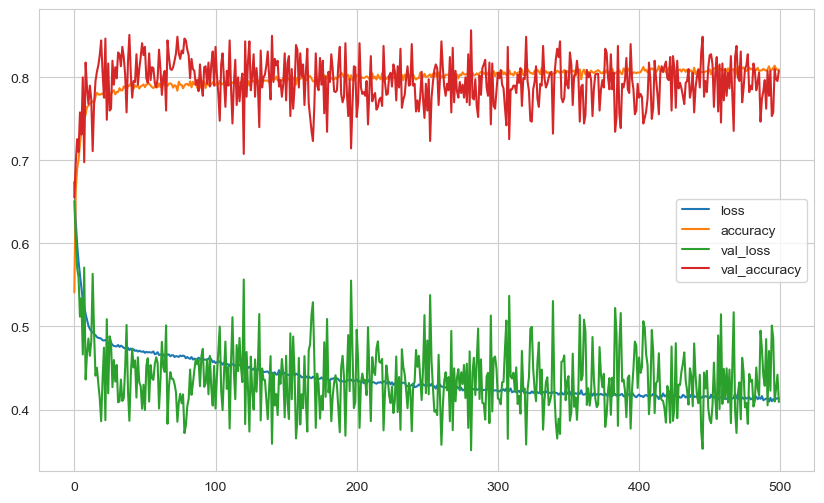

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [48]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.44659844040870667
accuracy :  0.7960000038146973


In [49]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[653 143]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       796
           1       0.50      0.70      0.58       204

    accuracy                           0.80      1000
   macro avg       0.71      0.76      0.72      1000
weighted avg       0.83      0.80      0.81      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [50]:
from tensorflow.keras.optimizers import Adam

In [52]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [53]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.6262 - accuracy: 0.6357 - val_loss: 0.4843 - val_accuracy: 0.7767
Epoch 2/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7132 - val_loss: 0.4359 - val_accuracy: 0.8222
Epoch 3/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7452 - val_loss: 0.5939 - val_accuracy: 0.6756
Epoch 4/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7607 - val_loss: 0.4322 - val_accuracy: 0.8044
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.7680 - val_loss: 0.4348 - val_accuracy: 0.8167
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.7702 - val_loss: 0.3990 - val_accuracy: 0.8222
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.7759 - val_loss: 0.4038 - val_accuracy: 0.8211

Epoch 58/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7972 - val_loss: 0.4329 - val_accuracy: 0.8089
Epoch 59/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8030 - val_loss: 0.4162 - val_accuracy: 0.8211
Epoch 60/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7974 - val_loss: 0.4496 - val_accuracy: 0.7756
Epoch 61/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.7986 - val_loss: 0.4069 - val_accuracy: 0.8178
Epoch 62/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7972 - val_loss: 0.4107 - val_accuracy: 0.8067
Epoch 63/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7989 - val_loss: 0.4873 - val_accuracy: 0.7800
Epoch 64/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7981 - val_loss: 0.4186 - val_accuracy:

Epoch 115/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8067 - val_loss: 0.4141 - val_accuracy: 0.8156
Epoch 116/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8047 - val_loss: 0.4444 - val_accuracy: 0.8033
Epoch 117/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8042 - val_loss: 0.4411 - val_accuracy: 0.8022
Epoch 118/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8067 - val_loss: 0.5098 - val_accuracy: 0.7678
Epoch 119/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8054 - val_loss: 0.4862 - val_accuracy: 0.7756
Epoch 120/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8063 - val_loss: 0.4433 - val_accuracy: 0.8144
Epoch 121/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8063 - val_loss: 0.5293 - val_ac

254/254 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8105 - val_loss: 0.4917 - val_accuracy: 0.7744
Epoch 172/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8094 - val_loss: 0.4357 - val_accuracy: 0.8189
Epoch 173/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8110 - val_loss: 0.5009 - val_accuracy: 0.7733
Epoch 174/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8085 - val_loss: 0.4594 - val_accuracy: 0.8011
Epoch 175/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8060 - val_loss: 0.4425 - val_accuracy: 0.8211
Epoch 176/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8105 - val_loss: 0.4502 - val_accuracy: 0.8033
Epoch 177/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8098 - val_loss: 0.4940 - val_accuracy: 0.7878

254/254 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8162 - val_loss: 0.4539 - val_accuracy: 0.8178
Epoch 228/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8120 - val_loss: 0.4398 - val_accuracy: 0.8200
Epoch 229/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8211 - val_loss: 0.5068 - val_accuracy: 0.7789
Epoch 230/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8133 - val_loss: 0.4473 - val_accuracy: 0.8100
Epoch 231/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8189 - val_loss: 0.4605 - val_accuracy: 0.8100
Epoch 232/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8116 - val_loss: 0.4508 - val_accuracy: 0.8067
Epoch 233/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8202 - val_loss: 0.4784 - val_accuracy: 0.7967

254/254 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8204 - val_loss: 0.5054 - val_accuracy: 0.7811
Epoch 284/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8183 - val_loss: 0.4599 - val_accuracy: 0.8044
Epoch 285/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8148 - val_loss: 0.4925 - val_accuracy: 0.7900
Epoch 286/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8149 - val_loss: 0.4555 - val_accuracy: 0.8156
Epoch 287/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8159 - val_loss: 0.4530 - val_accuracy: 0.8067
Epoch 288/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8209 - val_loss: 0.4746 - val_accuracy: 0.7922
Epoch 289/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8152 - val_loss: 0.4846 - val_accuracy: 0.7778

254/254 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8086 - val_loss: 0.4752 - val_accuracy: 0.7967
Epoch 340/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3744 - accuracy: 0.8142 - val_loss: 0.5072 - val_accuracy: 0.7689
Epoch 341/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.8106 - val_loss: 0.4537 - val_accuracy: 0.8011
Epoch 342/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8053 - val_loss: 0.4681 - val_accuracy: 0.8011
Epoch 343/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3725 - accuracy: 0.8114 - val_loss: 0.4835 - val_accuracy: 0.7944
Epoch 344/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3712 - accuracy: 0.8116 - val_loss: 0.4796 - val_accuracy: 0.7967
Epoch 345/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3752 - accuracy: 0.8102 - val_loss: 0.4679 - val_accuracy: 0.8144

254/254 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8174 - val_loss: 0.4926 - val_accuracy: 0.7722
Epoch 396/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3677 - accuracy: 0.8100 - val_loss: 0.4888 - val_accuracy: 0.8056
Epoch 397/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8194 - val_loss: 0.4966 - val_accuracy: 0.7856
Epoch 398/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8131 - val_loss: 0.5172 - val_accuracy: 0.7756
Epoch 399/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8151 - val_loss: 0.4995 - val_accuracy: 0.7933
Epoch 400/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8112 - val_loss: 0.5140 - val_accuracy: 0.7889
Epoch 401/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8132 - val_loss: 0.4974 - val_accuracy: 0.7933

254/254 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8123 - val_loss: 0.4998 - val_accuracy: 0.8056
Epoch 452/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3703 - accuracy: 0.8136 - val_loss: 0.4693 - val_accuracy: 0.8022
Epoch 453/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8114 - val_loss: 0.5033 - val_accuracy: 0.8044
Epoch 454/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8138 - val_loss: 0.5525 - val_accuracy: 0.7400
Epoch 455/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8062 - val_loss: 0.4916 - val_accuracy: 0.8011
Epoch 456/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8115 - val_loss: 0.5009 - val_accuracy: 0.8033
Epoch 457/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8181 - val_loss: 0.5142 - val_accuracy: 0.7889

<AxesSubplot:>

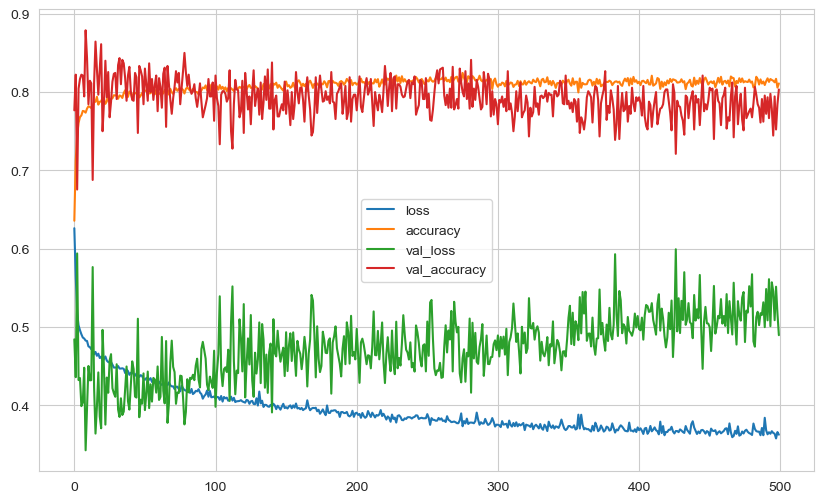

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [55]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6957749128341675
accuracy :  0.7459999918937683


In [56]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[607 189]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       796
           1       0.42      0.68      0.52       204

    accuracy                           0.75      1000
   macro avg       0.66      0.72      0.67      1000
weighted avg       0.81      0.75      0.76      1000



### Add Dropout Layer

In [58]:
from tensorflow.keras.layers import Dropout

In [59]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(5, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [60]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.7089 - accuracy: 0.6109 - val_loss: 0.6722 - val_accuracy: 0.7989
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.6798 - val_loss: 0.6779 - val_accuracy: 0.7967
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.6549 - val_loss: 0.6734 - val_accuracy: 0.7844
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.6707 - val_loss: 0.6661 - val_accuracy: 0.7756
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6863 - accuracy: 0.6914 - val_loss: 0.6711 - val_accuracy: 0.7522
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6830 - accuracy: 0.6699 - val_loss: 0.6711 - val_accuracy: 0.7289
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6774 - accuracy: 0.6842 - val_loss: 0.6601 - val_accuracy: 0.7411

Epoch 58/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5749 - accuracy: 0.7580 - val_loss: 0.4865 - val_accuracy: 0.8056
Epoch 59/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5906 - accuracy: 0.7564 - val_loss: 0.5017 - val_accuracy: 0.8033
Epoch 60/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5845 - accuracy: 0.7679 - val_loss: 0.5084 - val_accuracy: 0.8011
Epoch 61/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5790 - accuracy: 0.7609 - val_loss: 0.4897 - val_accuracy: 0.8278
Epoch 62/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5867 - accuracy: 0.7635 - val_loss: 0.5099 - val_accuracy: 0.7856
Epoch 63/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5810 - accuracy: 0.7649 - val_loss: 0.4934 - val_accuracy: 0.8067
Epoch 64/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5802 - accuracy: 0.7686 - val_loss: 0.4946 - val_accuracy:

Epoch 115/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7556 - val_loss: 0.4696 - val_accuracy: 0.8178
Epoch 116/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7551 - val_loss: 0.5050 - val_accuracy: 0.7722
Epoch 117/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5781 - accuracy: 0.7616 - val_loss: 0.4869 - val_accuracy: 0.7744
Epoch 118/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5755 - accuracy: 0.7669 - val_loss: 0.4865 - val_accuracy: 0.8011
Epoch 119/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5630 - accuracy: 0.7680 - val_loss: 0.4967 - val_accuracy: 0.7822
Epoch 120/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 0.7600 - val_loss: 0.4894 - val_accuracy: 0.7856
Epoch 121/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5678 - accuracy: 0.7647 - val_loss: 0.5077 - val_ac

254/254 [==============================] - 1s 2ms/step - loss: 0.5782 - accuracy: 0.7452 - val_loss: 0.4742 - val_accuracy: 0.7767
Epoch 172/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5649 - accuracy: 0.7510 - val_loss: 0.4783 - val_accuracy: 0.7967
Epoch 173/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5682 - accuracy: 0.7483 - val_loss: 0.4861 - val_accuracy: 0.7833
Epoch 174/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5707 - accuracy: 0.7553 - val_loss: 0.4696 - val_accuracy: 0.8033
Epoch 175/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5702 - accuracy: 0.7498 - val_loss: 0.4810 - val_accuracy: 0.7722
Epoch 176/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5691 - accuracy: 0.7565 - val_loss: 0.4742 - val_accuracy: 0.7822
Epoch 177/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5724 - accuracy: 0.7579 - val_loss: 0.5129 - val_accuracy: 0.7378

254/254 [==============================] - 1s 2ms/step - loss: 0.5682 - accuracy: 0.7704 - val_loss: 0.4923 - val_accuracy: 0.7600
Epoch 228/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5741 - accuracy: 0.7462 - val_loss: 0.4835 - val_accuracy: 0.7533
Epoch 229/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5735 - accuracy: 0.7586 - val_loss: 0.4898 - val_accuracy: 0.7500
Epoch 230/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5675 - accuracy: 0.7542 - val_loss: 0.4941 - val_accuracy: 0.7678
Epoch 231/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5692 - accuracy: 0.7570 - val_loss: 0.4809 - val_accuracy: 0.7733
Epoch 232/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5768 - accuracy: 0.7496 - val_loss: 0.4896 - val_accuracy: 0.7811
Epoch 233/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7573 - val_loss: 0.4792 - val_accuracy: 0.7889

254/254 [==============================] - 1s 2ms/step - loss: 0.5653 - accuracy: 0.7548 - val_loss: 0.4686 - val_accuracy: 0.7989
Epoch 284/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5658 - accuracy: 0.7637 - val_loss: 0.4890 - val_accuracy: 0.7722
Epoch 285/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7519 - val_loss: 0.4737 - val_accuracy: 0.7867
Epoch 286/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5668 - accuracy: 0.7569 - val_loss: 0.4733 - val_accuracy: 0.7889
Epoch 287/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5707 - accuracy: 0.7483 - val_loss: 0.4643 - val_accuracy: 0.8189
Epoch 288/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5657 - accuracy: 0.7598 - val_loss: 0.4766 - val_accuracy: 0.8011
Epoch 289/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5680 - accuracy: 0.7735 - val_loss: 0.4800 - val_accuracy: 0.8089

254/254 [==============================] - 1s 2ms/step - loss: 0.5697 - accuracy: 0.7598 - val_loss: 0.4647 - val_accuracy: 0.8078
Epoch 340/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5641 - accuracy: 0.7610 - val_loss: 0.4975 - val_accuracy: 0.7644
Epoch 341/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.7674 - val_loss: 0.4907 - val_accuracy: 0.7633
Epoch 342/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5603 - accuracy: 0.7584 - val_loss: 0.4873 - val_accuracy: 0.7733
Epoch 343/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7528 - val_loss: 0.4753 - val_accuracy: 0.7867
Epoch 344/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5681 - accuracy: 0.7580 - val_loss: 0.4594 - val_accuracy: 0.8156
Epoch 345/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7693 - val_loss: 0.4681 - val_accuracy: 0.8122

254/254 [==============================] - 1s 2ms/step - loss: 0.5597 - accuracy: 0.7694 - val_loss: 0.4624 - val_accuracy: 0.8056
Epoch 396/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5636 - accuracy: 0.7590 - val_loss: 0.4868 - val_accuracy: 0.7922
Epoch 397/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5616 - accuracy: 0.7757 - val_loss: 0.4877 - val_accuracy: 0.7944
Epoch 398/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5643 - accuracy: 0.7521 - val_loss: 0.4678 - val_accuracy: 0.8200
Epoch 399/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5572 - accuracy: 0.7568 - val_loss: 0.4691 - val_accuracy: 0.8067
Epoch 400/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5622 - accuracy: 0.7584 - val_loss: 0.4724 - val_accuracy: 0.7867
Epoch 401/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5675 - accuracy: 0.7556 - val_loss: 0.4901 - val_accuracy: 0.7989

254/254 [==============================] - 1s 2ms/step - loss: 0.5574 - accuracy: 0.7647 - val_loss: 0.4542 - val_accuracy: 0.8278
Epoch 452/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5622 - accuracy: 0.7620 - val_loss: 0.4822 - val_accuracy: 0.7633
Epoch 453/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7683 - val_loss: 0.4609 - val_accuracy: 0.8133
Epoch 454/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7693 - val_loss: 0.4722 - val_accuracy: 0.7989
Epoch 455/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5627 - accuracy: 0.7606 - val_loss: 0.4814 - val_accuracy: 0.7856
Epoch 456/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5638 - accuracy: 0.7604 - val_loss: 0.4693 - val_accuracy: 0.8089
Epoch 457/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5590 - accuracy: 0.7679 - val_loss: 0.4723 - val_accuracy: 0.7967

<AxesSubplot:>

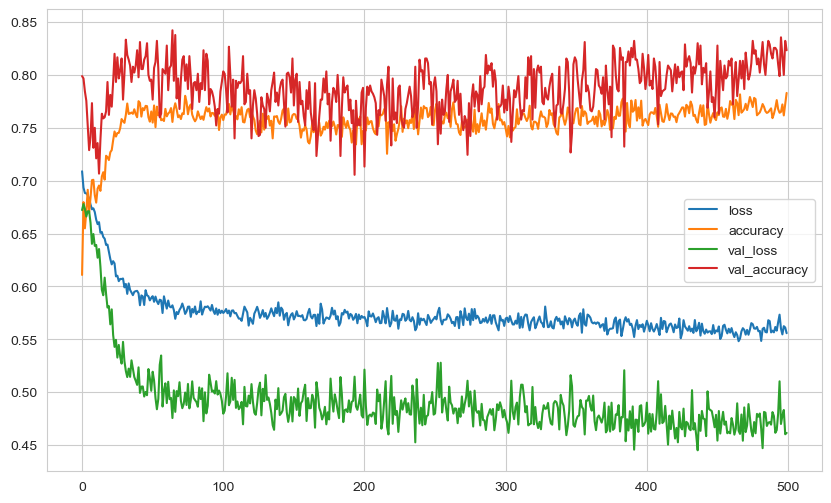

In [61]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [62]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5051407217979431
accuracy :  0.7789999842643738


In [63]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[633 163]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       796
           1       0.47      0.72      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [66]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [67]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks = [early_stop],
          class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.6859 - accuracy: 0.4690 - val_loss: 0.5925 - val_accuracy: 0.7178
Epoch 2/500
254/254 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6277 - val_loss: 0.6183 - val_accuracy: 0.6367
Epoch 3/500
254/254 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.6551 - val_loss: 0.5861 - val_accuracy: 0.6922
Epoch 4/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6819 - val_loss: 0.5756 - val_accuracy: 0.7044
Epoch 5/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7057 - val_loss: 0.5111 - val_accuracy: 0.7667
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7157 - val_loss: 0.5220 - val_accuracy: 0.7478
Epoch 7/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7296 - val_loss: 0.4683 - val_accuracy: 0.7900

Epoch 58/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.7716 - val_loss: 0.4418 - val_accuracy: 0.7744
Epoch 59/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7763 - val_loss: 0.4389 - val_accuracy: 0.7767
Epoch 60/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7737 - val_loss: 0.4766 - val_accuracy: 0.7456
Epoch 61/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4578 - accuracy: 0.7691 - val_loss: 0.4298 - val_accuracy: 0.7889
Epoch 62/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7743 - val_loss: 0.4372 - val_accuracy: 0.7856
Epoch 63/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7754 - val_loss: 0.4567 - val_accuracy: 0.7578
Epoch 64/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.7714 - val_loss: 0.4350 - val_accuracy:

<AxesSubplot:>

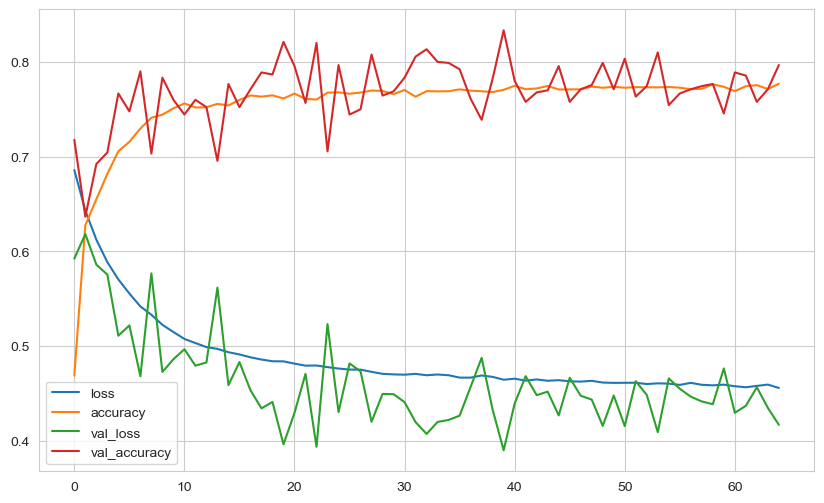

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [69]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4318268895149231
accuracy :  0.7829999923706055


#### Monitor the "val_recall" as metric

In [70]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[647 149]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       796
           1       0.48      0.67      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.78      0.80      1000



## GridSearchCV

In [71]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [72]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 5, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [73]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [75]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_exited.h5')

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___